# Food Security Monitoring Tool for Karamoja — 2017 Crop Season

## A Data Visualization Project

This project develops an interactive visualization tool to support food security decision-making in the Karamoja region of Uganda using satellite-derived agricultural data.

## Introduction

Food insecurity remains a major challenge in the Karamoja region of northeastern Uganda, where agricultural productivity is frequently affected by drought, pests, and limited farming resources. Sorghum and maize are the primary staple crops in this region, making their production levels critical indicators of food availability.

To support humanitarian planning, satellite-based models were used to estimate crop yields for the 2017 growing season. These estimates provide an opportunity to assess spatial patterns of agricultural production across districts and subcounties without relying solely on ground surveys.

This project develops an interactive data visualization tool to explore crop yield, production, and population data across Karamoja. The goal is to identify areas that may be at higher risk of food insecurity and to support data-driven decision-making for organizations working in the region.

In [2]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt

plt.style.use("ggplot") 

#### Creating Variables for the Dataset

In [3]:
dist = pd.read_csv("Uganda_Karamoja_District_Crop_Yield_Population.csv")
sub = pd.read_csv("Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv")

In [7]:
sub_shape = gpd.read_file("Uganda_Subcounties.shp")
dist_shape = gpd.read_file("Uganda_Districts.shp")

## Data Description

The dataset contains agricultural productivity and population statistics for the Karamoja region at both subcounty and district administrative levels.

Key variables include:

- Population (POP)
- Sorghum yield per hectare
- Maize yield per hectare
- Crop area
- Total production

Spatial boundary shapefiles enable geographic visualization of these indicators.

## Data Cleaning

The dataset was examined for missing values, duplicate records, and data type inconsistencies. No major issues were identified. Minor preprocessing steps included verification of numeric fields, removal of duplicates, and preparation of variables for analysis.



In [60]:
sub.isnull().sum()

OBJECTID            0
SUBCOUNTY_NAME      0
DISTRICT_NAME       0
POP                 0
Area                0
Karamoja            0
S_Yield_Ha          0
M_Yield_Ha          0
Crop_Area_Ha        0
S_Area_Ha           0
M_Area_Ha           0
S_Prod_Tot          0
M_Prod_Tot          0
Total_Production    0
Food_per_Person     0
Total_Yield_Ha      0
Sorghum_Share       0
dtype: int64

In [61]:
sub.dtypes

OBJECTID              int64
SUBCOUNTY_NAME       object
DISTRICT_NAME        object
POP                   int64
Area                  int64
Karamoja             object
S_Yield_Ha          float64
M_Yield_Ha          float64
Crop_Area_Ha        float64
S_Area_Ha           float64
M_Area_Ha           float64
S_Prod_Tot          float64
M_Prod_Tot          float64
Total_Production    float64
Food_per_Person     float64
Total_Yield_Ha      float64
Sorghum_Share       float64
dtype: object

In [8]:
sub["POP"] = pd.to_numeric(sub["POP"], errors="coerce")

In [9]:
sub.duplicated().sum()

0

In [10]:
sub = sub.drop_duplicates()

In [11]:
sub.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [12]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


In [13]:
sub.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824456,326.479336,2.543687e+05,2.896239e+05
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06


### The dataset was deemed suitable for exploratory analysis and visualization.


In [14]:
sub["Total_Production"] = sub["S_Prod_Tot"] + sub["M_Prod_Tot"]

sub["Food_per_Person"] = sub["Total_Production"] / sub["POP"]

sub["Total_Yield_Ha"] = sub["S_Yield_Ha"] + sub["M_Yield_Ha"]

sub["Sorghum_Share"] = sub["S_Area_Ha"] / sub["Crop_Area_Ha"]

### Initial Observations

The dataset contains both demographic and agricultural variables for each subcounty. The presence of production totals and yield per hectare allows estimation of food availability relative to population size.

No immediate structural issues are observed, though further cleaning and feature engineering will be conducted to derive meaningful indicators for food security analysis.


## Feature Engineering

Derived indicators were created to better assess food security:

- Total production of staple crops
- Food availability per person
- Overall land productivity
- Crop dependency patterns

These indicators provide more actionable insights than raw variables alone.

### Renaming the Column (Sub-county) for uniformity

In [15]:
sub_shape = sub_shape.rename(columns={"SNAME2014": "SUBCOUNTY_NAME"})

### Merging the dataframes

In [ ]:
# Merge the dataframes
geo_sub = sub_shape.merge(
    sub,
    left_on="SUBCOUNTY_NAME",        # Column in shapefile
    right_on="SUBCOUNTY_NAME",   # Column in CSV
    how="inner"  # Use 'inner' to keep only matching records
)

### Plot for Food Availability per Person

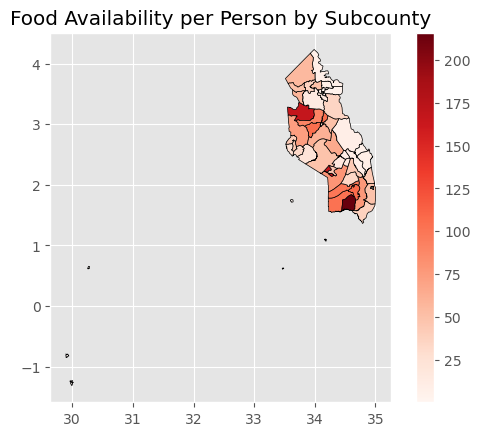

In [ ]:
geo_sub.plot(
    column="Food_per_Person",
    cmap="Reds",
    legend=True,
    edgecolor="black"
)

plt.title("Food Availability per Person by Subcounty")
plt.show()

### Converting the files

In [47]:
geo_sub.to_file("../data/processed/Karamoja_Subcounty_Clean.shp")
dist_shape.to_file("../data/processed/Karamoja_District_Clean.shp")

C:\Users\mwang\AppData\Local\Temp\ipykernel_9772\4044210806.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_sub.to_file("../data/processed/Karamoja_Subcounty_Clean.shp")
c:\Users\mwang\anaconda3\Lib\site-packages\pyogrio\raw.py:733: RuntimeWarning: Normalized/laundered field name: 'SUBCOUNTY_NAME' to 'SUBCOUNTY_'
  ogr_write(
c:\Users\mwang\anaconda3\Lib\site-packages\pyogrio\raw.py:733: RuntimeWarning: Normalized/laundered field name: 'DISTRICT_NAME' to 'DISTRICT_N'
  ogr_write(
c:\Users\mwang\anaconda3\Lib\site-packages\pyogrio\raw.py:733: RuntimeWarning: Normalized/laundered field name: 'Crop_Area_Ha' to 'Crop_Area_'
  ogr_write(
c:\Users\mwang\anaconda3\Lib\site-packages\pyogrio\raw.py:733: RuntimeWarning: Normalized/laundered field name: 'Total_Production' to 'Total_Prod'
  ogr_write(
c:\Users\mwang\anaconda3\Lib\site-packages\pyogrio\raw.py:733: RuntimeWarning: Normalized/laundered field name: 'Food_per_Person' to 'F

In [55]:
geo_sub.to_file("cleaned_agriculture_map.shp")

C:\Users\mwang\AppData\Local\Temp\ipykernel_9772\2638295713.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_sub.to_file("cleaned_agriculture_map.shp")
c:\Users\mwang\anaconda3\Lib\site-packages\pyogrio\raw.py:733: RuntimeWarning: Normalized/laundered field name: 'SUBCOUNTY_NAME' to 'SUBCOUNTY_'
  ogr_write(
c:\Users\mwang\anaconda3\Lib\site-packages\pyogrio\raw.py:733: RuntimeWarning: Normalized/laundered field name: 'DISTRICT_NAME' to 'DISTRICT_N'
  ogr_write(
c:\Users\mwang\anaconda3\Lib\site-packages\pyogrio\raw.py:733: RuntimeWarning: Normalized/laundered field name: 'Crop_Area_Ha' to 'Crop_Area_'
  ogr_write(
c:\Users\mwang\anaconda3\Lib\site-packages\pyogrio\raw.py:733: RuntimeWarning: Normalized/laundered field name: 'Total_Production' to 'Total_Prod'
  ogr_write(
c:\Users\mwang\anaconda3\Lib\site-packages\pyogrio\raw.py:733: RuntimeWarning: Normalized/laundered field name: 'Food_per_Person' to 'Food_per_P'
  ogr_wr

In [57]:
dist_shape.to_file("cleaned_districts_map.shp")


In [67]:
geo_sub.to_csv("cleaned_agriculture_data.csv", index=False)

## Key Findings

• Significant disparities exist between districts in production and yield  
• Kotido and Nakapiripirit dominate regional output  
• Moroto shows consistently low production levels  
• Food availability per person varies widely across subcounties  
• Some densely populated areas produce insufficient food  

These patterns highlight areas requiring targeted agricultural support.

## Recommendations

• Prioritize agricultural investment in low-production districts such as Moroto  
• Improve farming efficiency in high-population areas  
• Support irrigation and climate-resilient crops  
• Focus food aid programs on identified high-risk subcounties  
• Enhance data monitoring for future planning  